# IPython and cross language integration

This is demo on how cross-language integration works in a Jupyter notebook by using the features of the Reference IPython Kernel implementation. These features are completely base on the Kernel so need to be reimplemented on a per-kernel basis. Though they **also** work on pure terminal IPython.

Most of what you will see here are _just_ thin wrappers around already existing libraries, that do all the heavy lifinting, we just showing how seamless a cross language environement can be. 

Note: the term _just_ does not imply that the wrapers are simple, or easy to write. It indicate that the wraper are far from being complete, but that what is shown here is completely doable using normal Python syntax a bit of manual work.

Understanding the multiple languages themselves is not necessary; most of the example here are self explanatory and define a function that compute the nth `fibonnaci` number. We define it either using the classic recursive implementation, or sometime using an unrolled optimized version. As a reminder the fibbonaci sequence is defines a the following:

$$ F_n = \begin{cases} 1 &\mbox{if } n \leq 2 \\ 
F_{n-1}+F_{n-2} & \mbox{otherwise }\end{cases}$$

The fact that we calculate the fibonaaco sequence as little importance, except that the value of $F_n$ can grow _really_ fast. And the recursive implementation will have a hard time getting beyond (n=100). Be careful especaily if you calculate $F_{F_n}$ or more composition. Rememberring tha n=5 is stable via $F$ might be useful. 

### No Multiple kernels

An often requested feature for the Jupyter Notebook is the ability to have multiple kernels, often in many languages, for a single notebook. 

This is often a missunderstanding of what having a single kernel means. In particlular having multiple language means that you often need a single process that handle the dispatching of the instructions to the multiple underlying languages, and it is perfectly possible to do that in a Single Kernel which does orchestrate dispatching instruction and moving data around.

Wether the multiple languages that get orchestrated together are remote process, or simply library calls or more complex mechanisme becomes an implementation detail.

Python is knownto be a good "Glue" language, and over the year the IPython kernel as well has some extensions have shown that dynamic cross language integration can be seemleass form the point of view of the user.

In the followign we only scratch the surface of what is possible across a variety of languages.



In the followign you will see 2 constructs:

```
optional_python_lhs = %language (language RHS expression)
```

As well as 

```
%%language --cli like aruments
A block:
  containing expressions and statement
from another:
  language
```

# Basic Python cross-language integration

Python offer many facilities to call into other languages, wether we "shell-out"

In [3]:
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

## Steamlining calling subprocess

Well IPython define what are called Magics  `%something` for line magics, act only on the rest of the line, and call magics (start with `%%`)

In [4]:
%%ruby --out fib15
def fibonacci( n )
  return  n  if ( 0..1 ).include? n
  ( fibonacci( n - 1 ) + fibonacci( n - 2 ) )
end
puts fibonacci( 15 )

In [5]:
int(fib15.strip())

610

Ok, that's somewhat usefull, but not really that much right ? You cannot pass variable in... or can't you ? 

### Send variables in 

Calling subprocess can be quite cumbersome when workign interactively

In [6]:
import random
import string

def rand_names(k=10,l=10):
    for i in range(k):
        yield '_' + ''.join(random.choice(string.ascii_letters) for i in range(l))+'.o'
    

The `!something` expression is – for the purpose of these demo – equivalent to `%sh something` where `$variable` is looked up in `locals()` and replaced by it's `__repr__`

In [7]:
for f in rand_names():
    print('creating file',f)
    !touch $f

creating file _lvCWMSzTdy.o
creating file _sYnrwmVZMo.o
creating file _miOgpwjzbO.o
creating file _MTPFzRofxS.o
creating file _NIxnvXaLgQ.o
creating file _ARNcTdekTB.o
creating file _JrZSzRwMey.o
creating file _xtyIOGNVEx.o
creating file _fiHfpHprDU.o
creating file _zdpNSYvdbb.o


In [8]:
ls -1

Cross Language Integration.ipynb
Factoring.ipynb
IPython.ipynb
LBL-sep-2015.key
LBL-sep-2015.pdf
Lorenz Differential Equations.ipynb
MUSIC21.ipynb
SymPy.ipynb
_ARNcTdekTB.o
_JrZSzRwMey.o
_MTPFzRofxS.o
_NIxnvXaLgQ.o
_fiHfpHprDU.o
_lvCWMSzTdy.o
_miOgpwjzbO.o
_sYnrwmVZMo.o
_xtyIOGNVEx.o
_zdpNSYvdbb.o
notes


In [9]:
files = !ls *.o
files

['_ARNcTdekTB.o',
 '_JrZSzRwMey.o',
 '_MTPFzRofxS.o',
 '_NIxnvXaLgQ.o',
 '_fiHfpHprDU.o',
 '_lvCWMSzTdy.o',
 '_miOgpwjzbO.o',
 '_sYnrwmVZMo.o',
 '_xtyIOGNVEx.o',
 '_zdpNSYvdbb.o']

In [10]:
!rm -rf  *.{o,c,so} Cargo.* src target

_Who said I was going to use [rust-lang.org](https://www.rust-lang.org/en-US/) later ?_

In [11]:
ls

Cross Language Integration.ipynb     Lorenz Differential Equations.ipynb
Factoring.ipynb                      MUSIC21.ipynb
IPython.ipynb                        SymPy.ipynb
LBL-sep-2015.key                     notes
LBL-sep-2015.pdf


Ok, our directory is clean !

##  Add some state

Ok, that was kind of cute, fire-up a subprocess, serialize, pipe data in as a string, pipe-data out as a string, kill subprocess... What about somemething less state-less ?

Ok, that's pretty conveninent, it's kind-of inlineing bash-one liners where you can inject Python strin in it. 
what about multilines ? 

In [12]:
#!a2km add-env 'python 3' DYLD_FALLBACK_LIBRARY_PATH=/Users/bussonniermatthias/anaconda/pkgs/icu-54.1-0/lib:/Users/bussonniermatthias/anaconda/pkgs/zlib-1.2.8-3/lib 

In [1]:
import rpy2.rinterface

In [2]:
%matplotlib inline
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
%load_ext rpy2.ipython
from rpy2.interactive import process_revents

In [3]:
def fib(n):
    if n<2:
        return 1
    x,y = 1,1
    for i in range(n-2):
        x,y = y,x+y
    return y

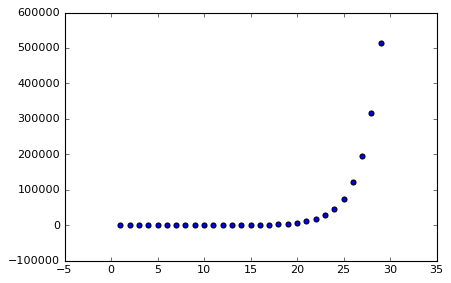

In [4]:
import numpy as np
X = np.arange(1,30)
Y = np.array([fib(x) for x in X])
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [5]:
%Rpush Y X


Call:
lm(formula = log(Y) ~ X)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.183663 -0.013497 -0.004137  0.006046  0.296094 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.775851   0.026173  -29.64   <2e-16 ***
X            0.479757   0.001524  314.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06866 on 27 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 9.912e+04 on 1 and 27 DF,  p-value: < 2.2e-16



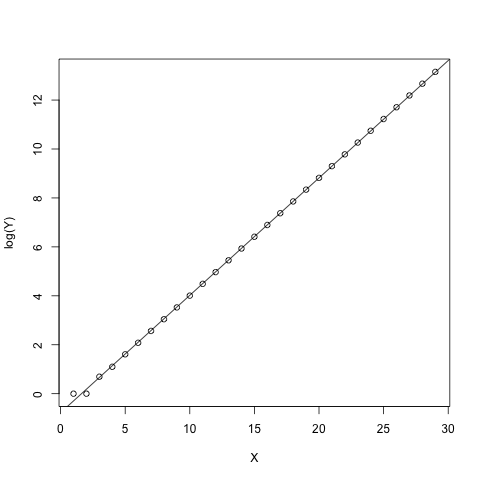

In [6]:
%%R
s = summary(lm(log(Y)~X))
val <- s$coefficients

plot(X, log(Y))
abline(s)
s

Great, we are happy as $F_n = \left[\frac{\phi^n}{\sqrt 5}\right]$, where `[]` is closest integer and $\phi = \frac{1+\sqrt 5}{2}$ 

In [7]:
%R val

array([[ -7.75850975e-01,   2.61726725e-02,  -2.96435519e+01,
          3.91031947e-22],
       [  4.79757090e-01,   1.52383191e-03,   3.14835966e+02,
          1.13718145e-49]])

In [8]:
coefs = %Rget val
y0,k = coefs.T[0]
y0,k

(-0.77585097534859138, 0.47975709043483161)

# CFFI

## Mix and Match : C

Expose some ability to inline C and rust through CFFI

In [14]:
import cffi_magic

In [15]:
rm -rf *.o *.c *.so Cargo.* src target

In [16]:
ls

Cross Language Integration.ipynb     Merced.key
LBL-sep-2015.key                     SymPy.ipynb
LBL-sep-2015.pdf                     ligo-binder/
Lorenz Differential Equations.ipynb  notes


In [18]:
%%cffi int cfib(int);


int cfib(int n)
{
    int res=0;
    if (n <= 2){
        res = 1;
    } else {
        res = cfib(n-1)+cfib(n-2);
    }
    return res;
}

In [19]:
cfib(5)

5

## Mix and Match : rust

In [21]:
%%rust int rfib(int);

#[no_mangle]
pub extern fn rfib(n: i32) -> i32 {
    match n {
        0 => 1,
        1 => 1,
        2 => 1,
        _ => rfib(n-1)+rfib(n-2)
    }
}

injecting  rfib in user ns


In [22]:
[rfib(x) for x in range(1,10)]

[1, 1, 2, 3, 5, 8, 13, 21, 34]

## fortran

In [23]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [24]:
%%fortran
RECURSIVE SUBROUTINE fibonacci(n,fibo)  
    IMPLICIT NONE
    INTEGER, INTENT(IN) :: n
    INTEGER, INTENT(OUT) :: fibo
    INTEGER :: tmp
    IF (n <= 2) THEN 
        fibo = 1
    ELSE
        CALL fibonacci(n-1,fibo)
        CALL fibonacci(n-2,tmp)
        fibo = fibo + tmp
    END IF
END SUBROUTINE fibonacci


In [25]:
[fibonacci(x) for x in range(1,10)]

[1, 1, 2, 3, 5, 8, 13, 21, 34]

### The Cake is not a lie !

In [26]:
fib(rfib(cfib(5)))

5

In [28]:
import itertools
lookup = {'c':cfib,
       'rust': rfib,
       'python': fib,
       'fortran': fibonacci}

print("Pray the demo-gods it wont segfault")

for order in itertools.permutations(lookup):
    t = 5
    for f in order:
        t = lookup[f](t)
    
    print(' -> '.join(order), ':', t)

Pray the demo-gods it wont segfault
c -> fortran -> rust -> python : 5
c -> fortran -> python -> rust : 5
c -> rust -> fortran -> python : 5
c -> rust -> python -> fortran : 5
c -> python -> fortran -> rust : 5
c -> python -> rust -> fortran : 5
fortran -> c -> rust -> python : 5
fortran -> c -> python -> rust : 5
fortran -> rust -> c -> python : 5
fortran -> rust -> python -> c : 5
fortran -> python -> c -> rust : 5
fortran -> python -> rust -> c : 5
rust -> c -> fortran -> python : 5
rust -> c -> python -> fortran : 5
rust -> fortran -> c -> python : 5
rust -> fortran -> python -> c : 5
rust -> python -> c -> fortran : 5
rust -> python -> fortran -> c : 5
python -> c -> fortran -> rust : 5
python -> c -> rust -> fortran : 5
python -> fortran -> c -> rust : 5
python -> fortran -> rust -> c : 5
python -> rust -> c -> fortran : 5
python -> rust -> fortran -> c : 5


In [29]:
print('it worked !')

it worked !


# The layer Cake, with Julia

In [30]:
%matplotlib inline

In [31]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [32]:
%julia @pyimport matplotlib.pyplot as plt

In [33]:
%julia @pyimport numpy as np

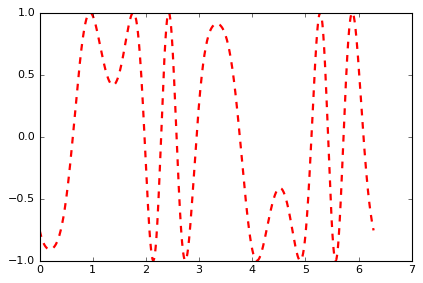

In [34]:
%%julia
                                        # Note how we mix numpy and julia:
t = linspace(0, 2*pi,1000);             # use the julia `linspace` and `pi`
s = sin(3*t + 4*np.cos(2*t));           # use the numpy cosine and julia sine
fig = plt.gcf()                         # **** WATCH THIS VARIABLE ****
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--")

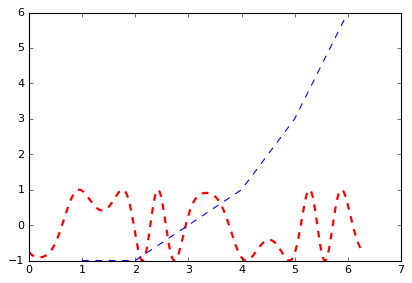

In [35]:
fig = %julia fig
fig.axes[0].plot(X[:6],(Y[:6]-2),'--')
fig

In [36]:
from __future__ import print_function

jlfib = %julia _fib(n, pyfib) = n <= 2 ? 1 : pyfib(n-1, _fib) + pyfib(n-2, _fib)

def pyfib(n, _fib):
    print('(P', end='')
    if n <= 2:
         r = 1
    else:
        print('(J', end='')
        r =  _fib(n-1, pyfib) + _fib(n-2, pyfib)
        print(')',end='')
    print(')',end='')
    return r

fibonacci = lambda x: pyfib(x, jlfib)

fibonacci(10)

(P(J(P(J(P(J(P(J(P)(P)))(P(J))(P(J))(P)))(P(J(P(J))(P)(P)(P)))(P(J(P(J))(P)(P)(P)))(P(J(P)(P)))))(P(J(P(J(P(J))(P)(P)(P)))(P(J(P)(P)))(P(J(P)(P)))(P(J))))(P(J(P(J(P(J))(P)(P)(P)))(P(J(P)(P)))(P(J(P)(P)))(P(J))))(P(J(P(J(P)(P)))(P(J))(P(J))(P)))))

55

In [37]:
print('Pfiew')

Pfiew
